<h1>TASK 2. ALGORITHMS FOR UNCONSTRAINED NONLINEAR OPTIMIZATION. DIRECT METHODS</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment configuration</a></li>
    <li><a href='#002'>Appendix to Section I</a></li>
    <li><a href='#003'>Appendix to Section II</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment configuration</h2>

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

<a name='002'></a>

<h2>Appendix to Section I</h2>

Implementing the functions and the range of values of the functions.

In [3]:
def cubic_function(x):
    return np.power(x, 3)

def absolute_function(x):
    return np.absolute(x-0.2)

def sine_function(x):
    return x * np.sin(1/x)

In [4]:
epsilon = 0.001

cubic_range = np.arange(0, 1+epsilon, epsilon)
absolute_range = np.arange(0, 1+epsilon, epsilon)
sine_range = np.arange(0.01, 1+epsilon, epsilon)

In [5]:
def plot(x, y, label):
    plt.plot(x, y, c='r')
    
    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(label)
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

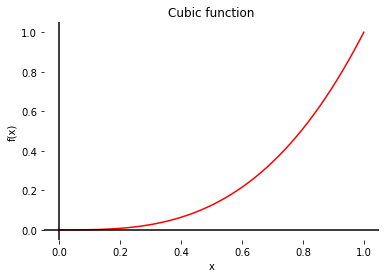

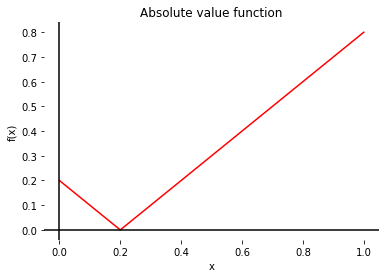

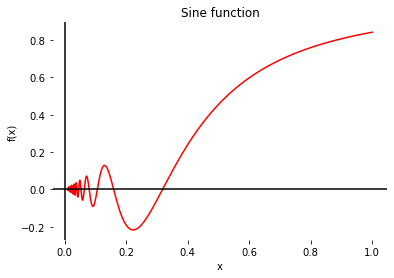

In [6]:
plot(cubic_range, cubic_function(cubic_range), 'Cubic function')
plot(absolute_range, absolute_function(absolute_range), 'Absolute value function')
plot(sine_range, sine_function(sine_range), 'Sine function')

Implementing the algorithms of exhaustive search, dichotomy and golden section search.

In [7]:
def exhaustive_search(function, function_range):
    iterations = 0
    epsilon = 0.001
    x_min=function_range[0]
    function_min=function(x_min)
    
    for x in np.arange(function_range[0], function_range[1]+epsilon, epsilon):
        if function(x) < function_min:
            function_min = function(x)
            x_min = x
        
        iterations = iterations + 1
    
    return x_min, function_min, iterations

def dichotomy_search(function, function_range):
    iterations = 0
    epsilon = 0.001
    delta = epsilon / 2
    lower_limit = function_range[0]
    higher_limit = function_range[1]
    
    while higher_limit - lower_limit >= epsilon:
        x_lower = (lower_limit + higher_limit - delta) / 2
        x_higher = (lower_limit + higher_limit + delta) / 2
        
        if function(x_lower) <= function(x_higher):
            higher_limit = x_higher
        else:
            lower_limit = x_lower
        
        iterations = iterations + 1
    
    x_min = np.around((lower_limit+higher_limit)/2, decimals=3)
    function_min = function(x_min)
    return x_min, function_min, iterations

def goldensection_search(function, function_range):
    iterations = 0
    epsilon = 0.001
    lower_limit = function_range[0]
    higher_limit = function_range[1]
    
    x_lower = lower_limit + (3 - np.sqrt(5)) * (higher_limit-lower_limit) / 2
    x_higher = higher_limit + (-3 + np.sqrt(5))*(higher_limit-lower_limit) / 2
    function_lower = function(x_lower)
    function_higher = function(x_higher)
    
    while higher_limit - lower_limit >= epsilon:
        if function_lower <= function_higher:
            higher_limit = x_higher
            x_higher = x_lower
            x_lower = lower_limit + (3 - np.sqrt(5)) * (higher_limit-lower_limit) / 2
            function_higher = function_lower
            function_lower = function(x_lower)
        else:
            lower_limit = x_lower
            x_lower = x_higher
            x_higher = higher_limit + (-3 + np.sqrt(5))*(higher_limit-lower_limit) / 2
            function_lower = function_higher
            function_higher = function(x_higher)
        
        iterations = iterations + 1
    
    x_min = np.around((lower_limit+higher_limit)/2, decimals=3)
    function_min = function(x_min)
    return x_min, function_min, iterations

In [8]:
def plot(x, y, dot_x, dot_y, label):
    plt.plot(x, y, c='r')
    
    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(label)
    ax.scatter(dot_x, dot_y, s=100, c='black')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

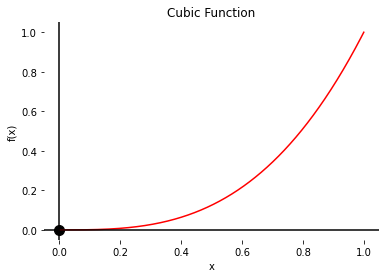

 Function Name |     Algorithm Name     |   x   |  f(x)  | Iterations 
----------------------------------------------------------------------
Cubic          | Exhaustive Search      | 0.000 | 0.000  |    1001   
----------------------------------------------------------------------
Cubic          | Dichotomy Search       | 0.000 | 0.000  |     11    
----------------------------------------------------------------------
Cubic          | Golden Section Search  | 0.000 | 0.000  |     15    


In [9]:
x_min, function_min, iterations = exhaustive_search(cubic_function, (0, 1))
plot(cubic_range, cubic_function(cubic_range), x_min, function_min, 'Cubic Function')

print(' Function Name |     Algorithm Name     |   x   |  f(x)  | Iterations ')
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Cubic',
    'Exhaustive Search',
    x_min,
    function_min,
    iterations))

x_min, function_min, iterations = dichotomy_search(cubic_function, (0, 1))
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Cubic',
    'Dichotomy Search',
    x_min,
    function_min,
    iterations))

x_min, function_min, iterations = goldensection_search(cubic_function, (0, 1))
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Cubic',
    'Golden Section Search',
    x_min,
    function_min,
    iterations))

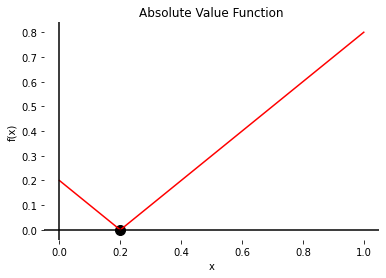

 Function Name |     Algorithm Name     |   x   |  f(x)  | Iterations 
----------------------------------------------------------------------
Absolute Value | Exhaustive Search      | 0.200 | 0.000  |    1001   
----------------------------------------------------------------------
Absolute Value | Dichotomy Search       | 0.200 | 0.000  |     11    
----------------------------------------------------------------------
Absolute Value | Golden Section Search  | 0.200 | 0.000  |     15    


In [10]:
x_min, function_min, iterations = exhaustive_search(absolute_function, (0, 1))
plot(absolute_range, absolute_function(absolute_range), x_min, function_min, 'Absolute Value Function')

print(' Function Name |     Algorithm Name     |   x   |  f(x)  | Iterations ')
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Absolute Value',
    'Exhaustive Search',
    x_min,
    function_min,
    iterations))

x_min, function_min, iterations = dichotomy_search(absolute_function, (0, 1))
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Absolute Value',
    'Dichotomy Search',
    x_min,
    function_min,
    iterations))

x_min, function_min, iterations = goldensection_search(absolute_function, (0, 1))
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Absolute Value',
    'Golden Section Search',
    x_min,
    function_min,
    iterations))

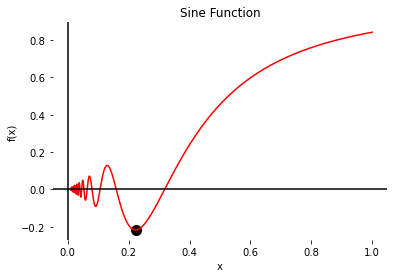

 Function Name |     Algorithm Name     |   x   |  f(x)  | Iterations 
----------------------------------------------------------------------
Sine           | Exhaustive Search      | 0.223 | -0.217 |    991    
----------------------------------------------------------------------
Sine           | Dichotomy Search       | 0.223 | -0.217 |     11    
----------------------------------------------------------------------
Sine           | Golden Section Search  | 0.223 | -0.217 |     15    


In [11]:
x_min, function_min, iterations = exhaustive_search(sine_function, (0.01, 1))
plot(sine_range, sine_function(sine_range), x_min, function_min, 'Sine Function')

print(' Function Name |     Algorithm Name     |   x   |  f(x)  | Iterations ')
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Sine',
    'Exhaustive Search',
    x_min,
    function_min,
    iterations))

x_min, function_min, iterations = dichotomy_search(sine_function, (0.01, 1))
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Sine',
    'Dichotomy Search',
    x_min,
    function_min,
    iterations))

x_min, function_min, iterations = goldensection_search(sine_function, (0.01, 1))
print('----------------------------------------------------------------------')
print('{: <14} | {: <22} | {: ^5.3f} | {: ^6.3f} | {: ^10}'.format(
    'Sine',
    'Golden Section Search',
    x_min,
    function_min,
    iterations))

<a name='003'></a>

<h2>Appendix to Section II</h2>

Implementing the functions and the range of values of the functions.

In [12]:
alpha = np.random.random()
beta = np.random.random()
noise = np.random.normal(0, 1, 100)
epsilon = 0.001

x_k = np.arange(0, 1, 0.01)
y_k = [alpha * x_k[k] + beta + noise[k] for k in range(len(x_k))]

In [13]:
def linear_approximant(x, a, b):
    return a * x + b

def rational_approximant(x, a, b):
    return a / (1 + b * x)

In [14]:
def loss_function(x, function):
    amount = 0
    
    for i in range(100):
        amount = amount + np.power(function(x_k[i], x[0], x[1]) - y_k[i], 2)
    
    return amount

Implementing the algorithms of exhaustive search, Gauss and Nelder-Mead.

In [15]:
def exhaustive_search(function, args):
    return scipy.optimize.brute(
        function,
        ranges=(slice(0, 1, epsilon), (slice(0, 1, epsilon))),
        args=(args,)
    )

def gauss_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        bounds=[(0, 1), (0, 1)],
        method='Powell',
        args=(args,)
    )

def neldermead_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        bounds=[(0, 1), (0, 1)],
        method='Nelder-Mead',
        args=(args,)
    )

In [16]:
exhaustive_lower, exhaustive_higher = exhaustive_search(loss_function, linear_approximant)

print('Exhaustive search arguments: {:.3f}, {:.3f}'.format(exhaustive_lower, exhaustive_higher))

Exhaustive search arguments: 0.871, 0.404


In [17]:
gauss_lower, gauss_higher = gauss_search(loss_function, linear_approximant).x

print('Gauss search arguments: {:.3f}, {:.3f}'.format(gauss_lower, gauss_higher))

Gauss search arguments: 0.871, 0.404


In [18]:
neldermead_lower, neldermead_higher = neldermead_search(loss_function, linear_approximant).x

print('Nelder-Mead search arguments: {:.3f}, {:.3f}'.format(neldermead_lower, neldermead_higher))

Nelder-Mead search arguments: 0.871, 0.404


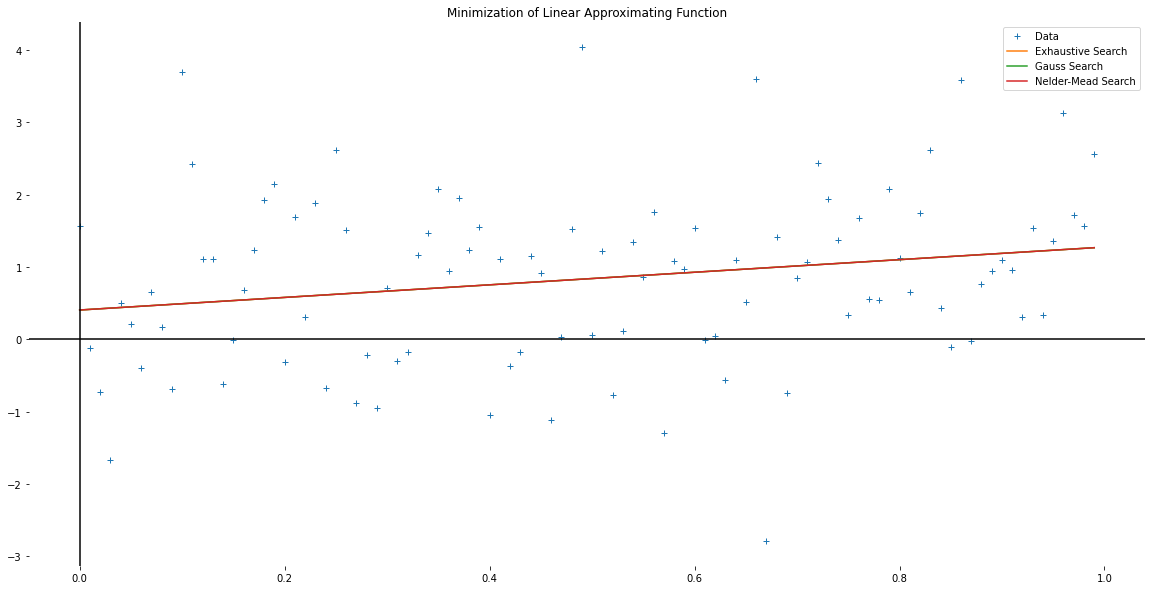

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [linear_approximant(x, exhaustive_lower, exhaustive_higher) for x in x_k]
plt.plot(x_k, y, label='Exhaustive Search')

y = [linear_approximant(x, gauss_lower, gauss_higher) for x in x_k]
plt.plot(x_k, y, label='Gauss Search')

y = [linear_approximant(x, neldermead_lower, neldermead_higher) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Linear Approximating Function')
ax.legend()

plt.show()

In [20]:
exhaustive_lower, exhaustive_higher = exhaustive_search(loss_function, rational_approximant)

print('Exhaustive search arguments: {:.3f}, {:.3f}'.format(exhaustive_lower, exhaustive_higher))

Exhaustive search arguments: 0.473, -0.716


In [21]:
gauss_lower, gauss_higher = gauss_search(loss_function, rational_approximant).x

print('Gauss search arguments: {:.3f}, {:.3f}'.format(gauss_lower, gauss_higher))

Gauss search arguments: 0.835, 0.000


In [22]:
neldermead_lower, neldermead_higher = neldermead_search(loss_function, rational_approximant).x

print('Nelder-Mead search arguments: {:.3f}, {:.3f}'.format(neldermead_lower, neldermead_higher))

Nelder-Mead search arguments: 0.473, -0.716


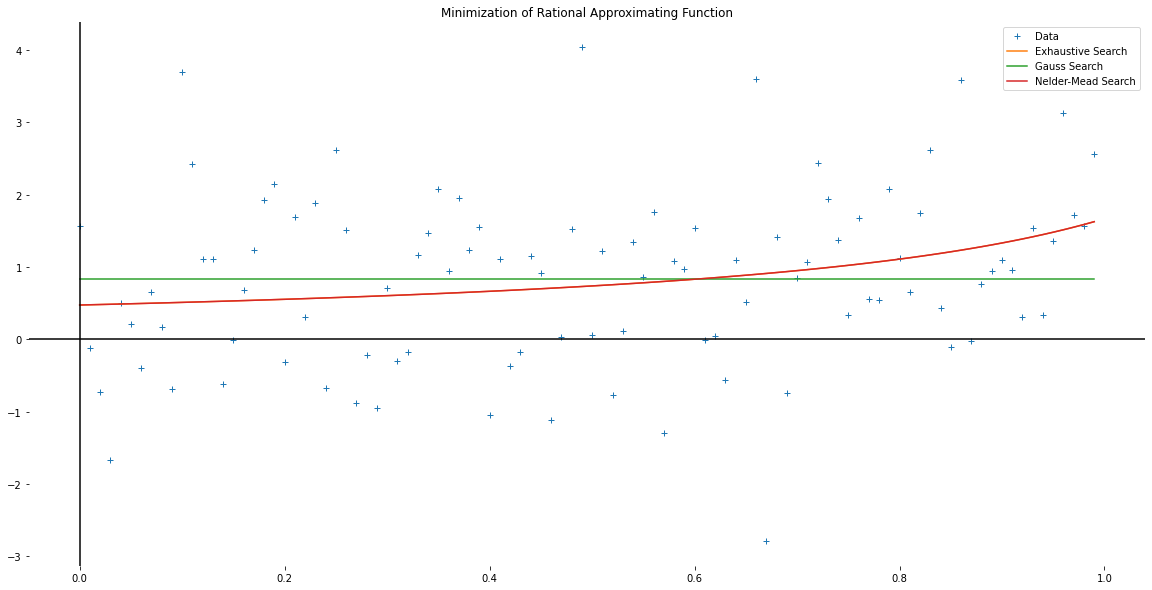

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

y = [rational_approximant(x, exhaustive_lower, exhaustive_higher) for x in x_k]
plt.plot(x_k, y, label='Exhaustive Search')

y = [rational_approximant(x, gauss_lower, gauss_higher) for x in x_k]
plt.plot(x_k, y, label='Gauss Search')

y = [rational_approximant(x, neldermead_lower, neldermead_higher) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Rational Approximating Function')
ax.legend()

plt.show()